In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import os
for dirname, _, filenames in os.walk('/content/your_dataset_directory'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
import keras
from tensorflow.keras.optimizers import Adamax
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Model,load_model
from keras.models import Model
from keras.layers import Input,ELU ,Dense ,Conv2D ,Add ,Activation , Flatten, Dropout , GlobalAveragePooling2D, MaxPooling2D, BatchNormalization, GlobalMaxPooling2D, AveragePooling2D, Subtract, Concatenate, ZeroPadding2D,Conv2DTranspose,SeparableConv2D
import tensorflow as tf
from keras import regularizers

In [ ]:
!pip install gdown
file_id = "1Bkr0Ii8JKUOHGFq71NkzGuqJpoG1mYrD"
output_file = "/content/dataset.zip"

import gdown
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

import zipfile
with zipfile.ZipFile(output_file, 'r') as zip_ref:
    zip_ref.extractall("/content")



Downloading...
From: https://drive.google.com/uc?id=1Bkr0Ii8JKUOHGFq71NkzGuqJpoG1mYrD
To: /content/dataset.zip
100%|██████████| 101M/101M [00:01<00:00, 67.0MB/s] 


In [ ]:
def dataset():
  df = pd.read_csv("/content/fer2013/fer2013/fer2013.csv")
  train_samples = df[df['Usage']=="Training"]
  validation_samples = df[df['Usage']=='PublicTest']
  test_samples=df[df["Usage"]=="PrivateTest"]

  y_train=keras.utils.to_categorical(train_samples.emotion, num_classes=7 )
  y_valid=keras.utils.to_categorical(validation_samples.emotion, num_classes=7)
  y_test=keras.utils.to_categorical(test_samples.emotion, num_classes=7)


  x_train = np.array([np.fromstring(image, np.uint8, sep=" ").reshape((48, 48)) for image in train_samples.pixels])
  x_valid = np.array([np.fromstring(image, np.uint8, sep=" ").reshape((48, 48)) for image in validation_samples.pixels])
  x_test = np.array([np.fromstring(image, np.uint8, sep=" ").reshape((48, 48)) for image in test_samples.pixels])
  return x_train, y_train, x_valid, y_valid, x_test, y_test

x_train, y_train, x_valid, y_valid, x_test, y_test = dataset()



/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


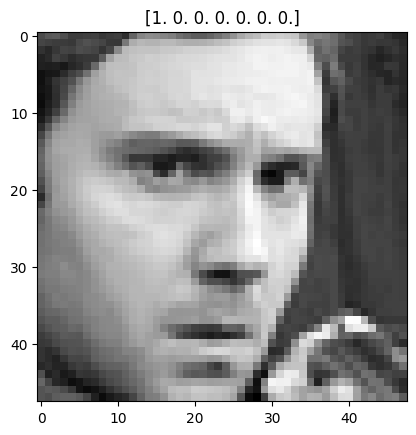

In [ ]:
first_image = x_train[0]
plt.imshow(first_image, cmap='gray')
plt.title(y_train[0])
plt.show()

In [ ]:
def model(lr=0.001):
  input=Input(shape=(48,48,1))
  block1_layer11=SeparableConv2D(32,(3,3), padding="valid",data_format='channels_last',kernel_regularizer=regularizers.l2(0.00001),name='block1_sep_conv1')(input)
  block1_layer1=Activation('relu',name='block1_relu1')(block1_layer11)
  block1_layer1=BatchNormalization(name='block1_batch1')(block1_layer1)
  block1_layer1=Dropout(0.1,name='block1_drop1')(block1_layer1)
  block1_layer2=SeparableConv2D(32,(3,3), padding='same',kernel_regularizer=regularizers.l2(0.00001),name='block1_sep_conv2')(block1_layer1)
  block1_layer2=Activation('relu',name='block1_relu2')(block1_layer2)
  block1_layer2=BatchNormalization(name='block1_batch2')(block1_layer2)
  block1_layer2=Dropout(0.1,name='block1_drop2')(block1_layer2)
  block1_layer3=SeparableConv2D(32,(3,3), padding='same',kernel_regularizer=regularizers.l2(0.00001),name='block1_sep_conv3')(block1_layer2)
  block1_add1=Add(name='block1_add')([block1_layer3,block1_layer11])
  block1_layer3=Activation('relu',name='block1_relu')(block1_add1)
  block1_layer3=BatchNormalization(name='block1_batch3')(block1_layer3)
  block1_layer3=ZeroPadding2D((3,3),name='block1_zeroo')(block1_layer3)
  block1_layer3=AveragePooling2D(name='block1_avg')(block1_layer3)
  block1_layer3=Dropout(0.1,name='block1_drop3')(block1_layer3)
  block2_layer11=SeparableConv2D(64,(3,3), padding='valid',kernel_regularizer=regularizers.l2(0.00001),name='block2_sep_conv1')(block1_layer3)
  block2_layer1=Activation('relu',name='block2_relu1')(block2_layer11)
  block2_layer1=BatchNormalization(name='block2_batch1')(block2_layer1)
  block2_layer1=Dropout(0.2,name='block2_drop1')(block2_layer1)
  block2_layer2=SeparableConv2D(64,(3,3), padding='same',kernel_regularizer=regularizers.l2(0.00001),name='block2_sep_conv2')(block2_layer1)
  block2_layer2=Activation('relu',name='block2_relu2')(block2_layer2)
  block2_layer2=BatchNormalization(name='block2_batch2')(block2_layer2)
  block2_layer2=Dropout(0.2,name='block2_drop2')(block2_layer2)
  block2_layer3=SeparableConv2D(64,(3,3), padding='same',kernel_regularizer=regularizers.l2(0.00001),name='block2_sep_conv3')(block2_layer2)
  block2_add1=Add(name='block2_add')([block2_layer3,block2_layer11])
  block2_layer3=Activation('relu',name='block2_relu')(block2_add1)
  block2_layer3=BatchNormalization(name='block2_batch3')(block2_layer3)
  block2_layer3=ZeroPadding2D((3,3),name='block2_zeroo')(block2_layer3)
  block2_layer3=AveragePooling2D(name='block2_avg')(block2_layer3)
  block2_layer3=Dropout(0.2,name='block2_drop3')(block2_layer3)
  block3_layer11=SeparableConv2D(96,(3,3), padding='valid',kernel_regularizer=regularizers.l2(0.00001),name='block3_sep_conv1')(block2_layer3)
  block3_layer1=Activation('relu',name='block3_relu1')(block3_layer11)
  block3_layer1=BatchNormalization(name='block3_batch1')(block3_layer1)
  block3_layer1=Dropout(0.25,name='block3_drop1')(block3_layer1)
  block3_layer2=SeparableConv2D(96,(3,3), padding='same',kernel_regularizer=regularizers.l2(0.00001),name='block3_sep_conv2')(block3_layer1)
  block3_layer2=Activation('relu',name='block3_relu2')(block3_layer2)
  block3_layer2=BatchNormalization(name='block3_batch2')(block3_layer2)
  block3_layer2=Dropout(0.25,name='block3_drop2')(block3_layer2)
  block3_layer3=SeparableConv2D(96,(3,3), padding='same',kernel_regularizer=regularizers.l2(0.00001),name='block3_sep_conv3')(block3_layer2)
  block3_add1=Add(name='block3_add')([block3_layer3,block3_layer11])
  block3_layer3=Activation('relu',name='block3_relu')(block3_add1)
  block3_layer3=BatchNormalization(name='block3_batch3')(block3_layer3)
  block3_layer3=ZeroPadding2D((3,3),name='block3_zeroo')(block3_layer3)
  block3_layer3=AveragePooling2D(name='block3_avg')(block3_layer3)
  block3_layer3=Dropout(0.25,name='block3_drop3')(block3_layer3)
  Global_Pooling=GlobalMaxPooling2D(name='Global_Pooling')(block3_layer3)
  Drop_Global_Pooling=Dropout(0.25,name='dense_drop1')(Global_Pooling)
  Dens1=Dense(96,activation='relu',name='dense1')(Drop_Global_Pooling)
  Dens1=BatchNormalization(name='dense_batch')(Dens1)
  Drop_Dens1=Dropout(0.25,name='dense_drop2')(Dens1)

  Softmax_=Dense(7,activation='softmax',name='softmax')(Drop_Dens1)
  model=Model(input, Softmax_)
  model.summary()
  model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001) , metrics=['accuracy'])
  return model



In [ ]:
model=model()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 1)]          0         []                            
                                                                                                  
 block1_sep_conv1 (Separabl  (None, 46, 46, 32)           73        ['input_1[0][0]']             
 eConv2D)                                                                                         
                                                                                                  
 block1_relu1 (Activation)   (None, 46, 46, 32)           0         ['block1_sep_conv1[0][0]']    
                                                                                                  
 block1_batch1 (BatchNormal  (None, 46, 46, 32)           128       ['block1_relu1[0][0]']    

In [ ]:
if __name__=="__main__":

    x_train, y_train, x_valid, y_valid, x_test, y_test =  dataset()

    x_train = x_train.reshape((-1,48,48,1)).astype(np.float32)
    x_valid = x_valid.reshape((-1,48,48,1)).astype(np.float32)
    x_test = x_test.reshape((-1,48,48,1)).astype(np.float32)
    filepath="/content/drive/My Drive/weights.bestvgg.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    callbacks_list = [checkpoint]
    x_train_std = x_train/255.
    x_valid_std = x_valid/255.
    x_test_std = x_test/255.
    aug = keras.preprocessing.image.ImageDataGenerator(rotation_range=0.25,width_shift_range=0.1,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode="nearest")
    with tf.device("/gpu:0"):
         history = model.fit_generator(aug.flow(np.array(x_train_std),np.array(y_train),batch_size=64),epochs=50,callbacks=callbacks_list,validation_data=(np.array(x_valid_std),np.array(y_valid)),steps_per_epoch=len(np.array(x_train_std))/64)
         loss_test, acc_test=model.evaluate(x_test_std,y_test)
         print(loss_test, acc_test)

Epoch 1/50


<ipython-input-8-5d2cabb47d72>:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(aug.flow(np.array(x_train_std),np.array(y_train),batch_size=64),epochs=50,callbacks=callbacks_list,validation_data=(np.array(x_valid_std),np.array(y_valid)),steps_per_epoch=len(np.array(x_train_std))/64)


449/448 [==============================] - ETA: 0s - loss: 2.0339 - accuracy: 0.2063
Epoch 1: val_loss improved from inf to 1.83606, saving model to /content/drive/My Drive/weights.bestvgg.h5
448/448 [==============================] - 392s 855ms/step - loss: 2.0339 - accuracy: 0.2063 - val_loss: 1.8361 - val_accuracy: 0.2494
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


449/448 [==============================] - ETA: 0s - loss: 1.8296 - accuracy: 0.2432
Epoch 2: val_loss improved from 1.83606 to 1.80227, saving model to /content/drive/My Drive/weights.bestvgg.h5
448/448 [==============================] - 374s 835ms/step - loss: 1.8296 - accuracy: 0.2432 - val_loss: 1.8023 - val_accuracy: 0.2491
Epoch 3/50
133/448 [=======>......................] - ETA: 4:21 - loss: 1.8000 - accuracy: 0.2586

In [ ]:
model.save("emotion_detector.h5")


In [ ]:
model_json = model.to_json()
with open("emotion_detector.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("motion_detector_weights.h5")


In [ ]:
model.save_weights("motion_detector_weights.h5")


In [ ]:
from keras.models import model_from_json

with open("emotion_detector.json", "r") as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model_weights.h5")

In [ ]:
labels = ['angry','disgust','fear','happy','neutral','sad','surprise']


In [ ]:
from keras.preprocessing.image import load_img

def ef(image, label):
    feature = np.array(image)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0, label

image = x_test[10]
label = y_test[10]
print("Original label:", label)
img, true_label = ef(image, label)
pred = model.predict(img)
pred_label = labels[pred.argmax()]
print("Model prediction:", pred_label)


In [1]:
import cv2
import numpy as np
from keras.models import model_from_json

# Load the pre-trained emotion detection model
with open("emotion_detector.json", "r") as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("motion_detector_weights.h5")

# Define the emotion labels
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Initialize the webcam capture
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Convert the frame to grayscale and resize it to match the model input size (48x48)
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized_frame = cv2.resize(gray_frame, (48, 48))

    # Normalize the frame
    normalized_frame = resized_frame / 255.0

    # Make a prediction using the loaded model
    prediction = loaded_model.predict(normalized_frame.reshape(1, 48, 48, 1))

    # Get the emotion label with the highest probability
    emotion = emotion_labels[np.argmax(prediction)]

    # Display the emotion on the frame
    cv2.putText(frame, "Emotion: " + emotion, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Display the frame
    cv2.imshow('Real-Time Emotion Detection', frame)

    # Exit the loop when the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 40ms/step
